In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
bengaluru_meteo = pd.read_csv('/kaggle/input/karnataka-aqi/Karnataka/Metrological Data/Bengaluru.csv', skiprows = 2, delimiter=',')
bengaluru_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°)
0,2024-01-01T00:00,17.2,93,0.0,912.9,12.0,99,19.0,100
1,2024-01-01T01:00,16.8,94,0.0,913.5,9.7,92,19.1,94
2,2024-01-01T02:00,17.3,89,0.0,914.4,13.0,96,20.0,98
3,2024-01-01T03:00,19.5,75,0.0,915.4,13.7,104,18.2,104
4,2024-01-01T04:00,21.8,65,0.0,916.4,12.4,98,15.7,99
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,18.1,87,0.0,914.5,12.0,66,23.5,65
8780,2024-12-31T20:00,17.5,88,0.0,913.8,11.9,67,23.5,64
8781,2024-12-31T21:00,17.0,87,0.0,913.0,12.4,64,24.7,63
8782,2024-12-31T22:00,16.7,84,0.0,912.3,12.8,61,25.9,61


In [3]:
bengaluru_pollutants = pd.read_csv('/kaggle/input/karnataka-aqi/Karnataka/Pollutants/Bengaluru.csv', delimiter= ',')
bengaluru_pollutants['Timestamp'] = bengaluru_meteo['time']
bengaluru_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
bengaluru_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,37.90,83.74,5.01,18.67,21.33,12.29,7.39,0.56,28.69,...,0.82,20.40,77.26,0.58,124.91,0.0,0.0,48.64,852.18,-0.08
1,2024-01-01T01:00,46.54,88.74,5.14,18.57,21.32,12.30,7.15,0.58,28.86,...,0.82,20.02,79.38,0.61,134.39,0.0,0.0,48.55,853.68,-0.08
2,2024-01-01T02:00,43.62,89.61,4.85,18.08,20.44,11.98,7.19,0.53,27.29,...,0.82,19.61,81.86,0.65,118.38,0.0,0.0,48.54,855.35,-0.08
3,2024-01-01T03:00,40.39,87.49,4.91,17.96,20.50,12.03,7.33,0.54,28.83,...,0.82,19.25,82.38,0.71,112.03,0.0,0.0,48.87,856.28,-0.07
4,2024-01-01T04:00,41.36,87.18,4.86,17.61,20.14,11.99,7.52,0.53,30.85,...,0.81,19.03,82.28,0.63,120.37,0.0,0.0,48.76,856.17,-0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,34.66,74.89,4.75,23.99,24.52,11.34,9.59,0.74,24.30,...,0.48,22.90,58.05,1.79,154.75,0.0,0.0,13.73,832.90,-0.75
8780,2024-12-31T20:00,38.71,79.02,4.56,23.65,24.06,11.24,9.89,0.70,24.63,...,0.49,22.07,62.97,1.77,151.20,0.0,0.0,11.02,834.71,-0.76
8781,2024-12-31T21:00,42.65,81.93,4.49,23.20,23.69,11.17,9.65,0.71,24.92,...,0.49,21.39,67.65,1.83,146.57,0.0,0.0,11.25,836.14,-0.76
8782,2024-12-31T22:00,45.91,84.68,4.51,22.75,23.34,11.32,9.61,0.68,24.88,...,0.49,20.88,69.61,2.11,153.09,0.0,0.0,11.35,836.67,-0.75


In [4]:
bengaluru = pd.merge(bengaluru_meteo.iloc[:, :], bengaluru_pollutants.iloc[:, 0:3], on='time')
bengaluru

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,17.2,93,0.0,912.9,12.0,99,19.0,100,37.90,83.74
1,2024-01-01T01:00,16.8,94,0.0,913.5,9.7,92,19.1,94,46.54,88.74
2,2024-01-01T02:00,17.3,89,0.0,914.4,13.0,96,20.0,98,43.62,89.61
3,2024-01-01T03:00,19.5,75,0.0,915.4,13.7,104,18.2,104,40.39,87.49
4,2024-01-01T04:00,21.8,65,0.0,916.4,12.4,98,15.7,99,41.36,87.18
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,18.1,87,0.0,914.5,12.0,66,23.5,65,34.66,74.89
8780,2024-12-31T20:00,17.5,88,0.0,913.8,11.9,67,23.5,64,38.71,79.02
8781,2024-12-31T21:00,17.0,87,0.0,913.0,12.4,64,24.7,63,42.65,81.93
8782,2024-12-31T22:00,16.7,84,0.0,912.3,12.8,61,25.9,61,45.91,84.68


In [5]:
bengaluru['city'] = 'Bengaluru'
bengaluru

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,17.2,93,0.0,912.9,12.0,99,19.0,100,37.90,83.74,Bengaluru
1,2024-01-01T01:00,16.8,94,0.0,913.5,9.7,92,19.1,94,46.54,88.74,Bengaluru
2,2024-01-01T02:00,17.3,89,0.0,914.4,13.0,96,20.0,98,43.62,89.61,Bengaluru
3,2024-01-01T03:00,19.5,75,0.0,915.4,13.7,104,18.2,104,40.39,87.49,Bengaluru
4,2024-01-01T04:00,21.8,65,0.0,916.4,12.4,98,15.7,99,41.36,87.18,Bengaluru
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,18.1,87,0.0,914.5,12.0,66,23.5,65,34.66,74.89,Bengaluru
8780,2024-12-31T20:00,17.5,88,0.0,913.8,11.9,67,23.5,64,38.71,79.02,Bengaluru
8781,2024-12-31T21:00,17.0,87,0.0,913.0,12.4,64,24.7,63,42.65,81.93,Bengaluru
8782,2024-12-31T22:00,16.7,84,0.0,912.3,12.8,61,25.9,61,45.91,84.68,Bengaluru


In [6]:
bengaluru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    bengaluru[delay1_col] = bengaluru[col].shift(1)
    delay2_col = col + "_delay2"
    bengaluru[delay2_col] = bengaluru[col].shift(2)
    bengaluru.loc[0, delay1_col] = bengaluru[col].iloc[-1]
    bengaluru.loc[1, delay2_col] = bengaluru[col].iloc[-1]
    bengaluru.loc[0, delay2_col] = bengaluru[col].iloc[-2]

bengaluru

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,17.2,93,0.0,912.9,12.0,99,19.0,100,37.90,83.74,Bengaluru,44.51,45.91,85.85,84.68
1,2024-01-01T01:00,16.8,94,0.0,913.5,9.7,92,19.1,94,46.54,88.74,Bengaluru,37.90,44.51,83.74,85.85
2,2024-01-01T02:00,17.3,89,0.0,914.4,13.0,96,20.0,98,43.62,89.61,Bengaluru,46.54,37.90,88.74,83.74
3,2024-01-01T03:00,19.5,75,0.0,915.4,13.7,104,18.2,104,40.39,87.49,Bengaluru,43.62,46.54,89.61,88.74
4,2024-01-01T04:00,21.8,65,0.0,916.4,12.4,98,15.7,99,41.36,87.18,Bengaluru,40.39,43.62,87.49,89.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,18.1,87,0.0,914.5,12.0,66,23.5,65,34.66,74.89,Bengaluru,27.02,21.79,66.11,57.21
8780,2024-12-31T20:00,17.5,88,0.0,913.8,11.9,67,23.5,64,38.71,79.02,Bengaluru,34.66,27.02,74.89,66.11
8781,2024-12-31T21:00,17.0,87,0.0,913.0,12.4,64,24.7,63,42.65,81.93,Bengaluru,38.71,34.66,79.02,74.89
8782,2024-12-31T22:00,16.7,84,0.0,912.3,12.8,61,25.9,61,45.91,84.68,Bengaluru,42.65,38.71,81.93,79.02


In [8]:
belgaum_meteo = pd.read_csv('/kaggle/input/karnataka-aqi/Karnataka/Metrological Data/Belgaum.csv', skiprows=2, delimiter=',')
belgaum_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°)
0,2024-01-01T00:00,16.7,73,0.0,927.9,7.4,119,19.9,132
1,2024-01-01T01:00,16.6,76,0.0,929.0,7.6,109,20.1,119
2,2024-01-01T02:00,17.4,74,0.0,929.7,9.4,108,21.7,117
3,2024-01-01T03:00,20.1,68,0.0,931.0,11.8,110,24.1,112
4,2024-01-01T04:00,22.3,65,0.0,932.1,12.3,111,17.0,111
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.9,56,0.0,930.9,12.6,66,26.9,73
8780,2024-12-31T20:00,19.4,60,0.0,930.0,11.5,68,25.9,74
8781,2024-12-31T21:00,19.2,61,0.0,929.2,11.1,68,25.8,76
8782,2024-12-31T22:00,19.2,61,0.0,928.5,11.9,68,26.6,75


In [9]:
belgaum_pollutants = pd.read_csv('/kaggle/input/karnataka-aqi/Karnataka/Pollutants/Belgaum.csv', delimiter= ',')
belgaum_pollutants['Timestamp'] = belgaum_meteo['time']
belgaum_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
belgaum_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,37.16,81.62,67.83,30.24,98.08,117.89,6.70,1.25,18.89,...,2.84,24.36,49.94,0.02,139.30,NaN,NaN,NaN,NaN,NaN
1,2024-01-01T01:00,40.80,75.47,70.44,32.35,102.80,117.38,6.99,1.10,19.90,...,2.48,23.42,48.00,0.01,88.81,NaN,NaN,NaN,NaN,NaN
2,2024-01-01T02:00,47.06,70.08,70.38,29.02,99.40,116.17,7.15,0.98,19.42,...,2.31,23.19,47.53,0.02,92.36,NaN,NaN,NaN,NaN,NaN
3,2024-01-01T03:00,40.61,58.18,65.13,28.36,93.48,116.59,7.05,0.98,19.30,...,2.31,23.27,47.71,NaN,46.97,NaN,NaN,NaN,NaN,NaN
4,2024-01-01T04:00,28.96,43.28,60.70,28.80,89.51,117.56,7.04,1.08,18.78,...,2.49,22.74,46.62,NaN,93.84,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,26.05,58.16,56.08,66.60,122.59,8.08,12.51,0.28,19.62,...,0.61,30.56,62.64,0.52,228.94,NaN,NaN,NaN,NaN,NaN
8780,2024-12-31T20:00,25.22,55.31,62.87,81.44,144.29,7.92,11.54,0.25,19.53,...,0.59,29.06,59.58,0.14,112.10,NaN,NaN,NaN,NaN,NaN
8781,2024-12-31T21:00,24.20,53.10,56.52,62.20,118.74,8.50,11.99,0.21,19.50,...,0.55,28.76,58.97,0.34,197.07,NaN,NaN,NaN,NaN,NaN
8782,2024-12-31T22:00,21.49,47.14,52.36,45.66,98.06,7.66,10.88,0.22,19.55,...,0.56,29.06,59.58,0.38,222.47,NaN,NaN,NaN,NaN,NaN


In [10]:
belgaum = pd.merge(belgaum_meteo.iloc[:, :], belgaum_pollutants.iloc[:, 0:3], on='time')
belgaum

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,16.7,73,0.0,927.9,7.4,119,19.9,132,37.16,81.62
1,2024-01-01T01:00,16.6,76,0.0,929.0,7.6,109,20.1,119,40.80,75.47
2,2024-01-01T02:00,17.4,74,0.0,929.7,9.4,108,21.7,117,47.06,70.08
3,2024-01-01T03:00,20.1,68,0.0,931.0,11.8,110,24.1,112,40.61,58.18
4,2024-01-01T04:00,22.3,65,0.0,932.1,12.3,111,17.0,111,28.96,43.28
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.9,56,0.0,930.9,12.6,66,26.9,73,26.05,58.16
8780,2024-12-31T20:00,19.4,60,0.0,930.0,11.5,68,25.9,74,25.22,55.31
8781,2024-12-31T21:00,19.2,61,0.0,929.2,11.1,68,25.8,76,24.20,53.10
8782,2024-12-31T22:00,19.2,61,0.0,928.5,11.9,68,26.6,75,21.49,47.14


In [11]:
belgaum['city'] = 'Belgaum'
belgaum

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,16.7,73,0.0,927.9,7.4,119,19.9,132,37.16,81.62,Belgaum
1,2024-01-01T01:00,16.6,76,0.0,929.0,7.6,109,20.1,119,40.80,75.47,Belgaum
2,2024-01-01T02:00,17.4,74,0.0,929.7,9.4,108,21.7,117,47.06,70.08,Belgaum
3,2024-01-01T03:00,20.1,68,0.0,931.0,11.8,110,24.1,112,40.61,58.18,Belgaum
4,2024-01-01T04:00,22.3,65,0.0,932.1,12.3,111,17.0,111,28.96,43.28,Belgaum
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.9,56,0.0,930.9,12.6,66,26.9,73,26.05,58.16,Belgaum
8780,2024-12-31T20:00,19.4,60,0.0,930.0,11.5,68,25.9,74,25.22,55.31,Belgaum
8781,2024-12-31T21:00,19.2,61,0.0,929.2,11.1,68,25.8,76,24.20,53.10,Belgaum
8782,2024-12-31T22:00,19.2,61,0.0,928.5,11.9,68,26.6,75,21.49,47.14,Belgaum


In [12]:
belgaum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             7577 non-null   float64
 10  PM10 (µg/m³)              7648 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [13]:
belgaum = belgaum.interpolate()
belgaum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [14]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    belgaum[delay1_col] = belgaum[col].shift(1)
    delay2_col = col + "_delay2"
    belgaum[delay2_col] = belgaum[col].shift(2)
    belgaum.loc[0, delay1_col] = belgaum[col].iloc[-1]
    belgaum.loc[1, delay2_col] = belgaum[col].iloc[-1]
    belgaum.loc[0, delay2_col] = belgaum[col].iloc[-2]

belgaum

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,16.7,73,0.0,927.9,7.4,119,19.9,132,37.16,81.62,Belgaum,19.50,21.49,42.76,47.14
1,2024-01-01T01:00,16.6,76,0.0,929.0,7.6,109,20.1,119,40.80,75.47,Belgaum,37.16,19.50,81.62,42.76
2,2024-01-01T02:00,17.4,74,0.0,929.7,9.4,108,21.7,117,47.06,70.08,Belgaum,40.80,37.16,75.47,81.62
3,2024-01-01T03:00,20.1,68,0.0,931.0,11.8,110,24.1,112,40.61,58.18,Belgaum,47.06,40.80,70.08,75.47
4,2024-01-01T04:00,22.3,65,0.0,932.1,12.3,111,17.0,111,28.96,43.28,Belgaum,40.61,47.06,58.18,70.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.9,56,0.0,930.9,12.6,66,26.9,73,26.05,58.16,Belgaum,22.59,19.31,49.55,42.38
8780,2024-12-31T20:00,19.4,60,0.0,930.0,11.5,68,25.9,74,25.22,55.31,Belgaum,26.05,22.59,58.16,49.55
8781,2024-12-31T21:00,19.2,61,0.0,929.2,11.1,68,25.8,76,24.20,53.10,Belgaum,25.22,26.05,55.31,58.16
8782,2024-12-31T22:00,19.2,61,0.0,928.5,11.9,68,26.6,75,21.49,47.14,Belgaum,24.20,25.22,53.10,55.31


In [15]:
dharwad_meteo = pd.read_csv('/kaggle/input/karnataka-aqi/Karnataka/Metrological Data/Dharwad.csv', skiprows=2, delimiter=',')
dharwad_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°)
0,2024-01-01T00:00,17.1,71,0.0,931.6,7.6,93,16.5,113
1,2024-01-01T01:00,17.5,75,0.0,933.0,8.2,75,19.5,93
2,2024-01-01T02:00,18.1,76,0.0,933.7,10.8,88,22.0,100
3,2024-01-01T03:00,20.5,70,0.0,934.7,12.3,97,19.9,103
4,2024-01-01T04:00,22.9,63,0.0,935.6,14.3,108,19.0,109
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.5,57,0.0,934.0,10.8,66,26.2,72
8780,2024-12-31T20:00,18.7,60,0.0,933.1,8.8,67,23.3,73
8781,2024-12-31T21:00,18.0,63,0.0,932.4,8.4,62,22.1,74
8782,2024-12-31T22:00,17.5,65,0.0,931.8,8.2,67,21.5,79


In [16]:
dharwad_pollutants = pd.read_csv('/kaggle/input/karnataka-aqi/Karnataka/Pollutants/Dharwad.csv', delimiter= ',')
dharwad_pollutants['Timestamp'] = dharwad_meteo['time']
dharwad_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
dharwad_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,29.19,120.57,3.2,27.18,28.78,10.86,3.38,1.11,41.75,...,1.25,23.08,57.19,1.75,83.25,0.0,0.0,337.64,903.86,NaN
1,2024-01-01T01:00,29.19,99.20,NaN,20.29,20.29,10.75,3.50,0.98,45.46,...,1.24,22.70,57.19,2.00,108.36,0.0,0.0,357.66,903.61,NaN
2,2024-01-01T02:00,29.19,102.13,NaN,13.60,13.60,10.80,3.52,0.91,42.68,...,1.24,22.45,57.19,1.75,145.04,0.0,0.0,375.51,903.17,NaN
3,2024-01-01T03:00,29.19,86.42,NaN,12.53,12.53,10.74,3.22,1.23,29.29,...,1.23,22.24,57.19,1.00,124.72,0.0,0.0,397.77,903.16,NaN
4,2024-01-01T04:00,29.19,90.71,NaN,12.58,12.58,10.61,3.16,1.38,20.26,...,1.22,22.02,57.19,1.75,155.64,0.0,0.0,418.39,903.42,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8780,2024-12-31T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8781,2024-12-31T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8782,2024-12-31T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [17]:
dharwad = pd.merge(dharwad_meteo.iloc[:, :], dharwad_pollutants.iloc[:, 0:3], on='time')
dharwad

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,17.1,71,0.0,931.6,7.6,93,16.5,113,29.19,120.57
1,2024-01-01T01:00,17.5,75,0.0,933.0,8.2,75,19.5,93,29.19,99.20
2,2024-01-01T02:00,18.1,76,0.0,933.7,10.8,88,22.0,100,29.19,102.13
3,2024-01-01T03:00,20.5,70,0.0,934.7,12.3,97,19.9,103,29.19,86.42
4,2024-01-01T04:00,22.9,63,0.0,935.6,14.3,108,19.0,109,29.19,90.71
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.5,57,0.0,934.0,10.8,66,26.2,72,NaN,NaN
8780,2024-12-31T20:00,18.7,60,0.0,933.1,8.8,67,23.3,73,NaN,NaN
8781,2024-12-31T21:00,18.0,63,0.0,932.4,8.4,62,22.1,74,NaN,NaN
8782,2024-12-31T22:00,17.5,65,0.0,931.8,8.2,67,21.5,79,NaN,NaN


In [18]:
dharwad['city'] = 'Dharwad'
dharwad

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,17.1,71,0.0,931.6,7.6,93,16.5,113,29.19,120.57,Dharwad
1,2024-01-01T01:00,17.5,75,0.0,933.0,8.2,75,19.5,93,29.19,99.20,Dharwad
2,2024-01-01T02:00,18.1,76,0.0,933.7,10.8,88,22.0,100,29.19,102.13,Dharwad
3,2024-01-01T03:00,20.5,70,0.0,934.7,12.3,97,19.9,103,29.19,86.42,Dharwad
4,2024-01-01T04:00,22.9,63,0.0,935.6,14.3,108,19.0,109,29.19,90.71,Dharwad
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.5,57,0.0,934.0,10.8,66,26.2,72,NaN,NaN,Dharwad
8780,2024-12-31T20:00,18.7,60,0.0,933.1,8.8,67,23.3,73,NaN,NaN,Dharwad
8781,2024-12-31T21:00,18.0,63,0.0,932.4,8.4,62,22.1,74,NaN,NaN,Dharwad
8782,2024-12-31T22:00,17.5,65,0.0,931.8,8.2,67,21.5,79,NaN,NaN,Dharwad


In [19]:
dharwad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             7723 non-null   float64
 10  PM10 (µg/m³)              7730 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [20]:
dharwad = dharwad.interpolate()
dharwad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [21]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    dharwad[delay1_col] = dharwad[col].shift(1)
    delay2_col = col + "_delay2"
    dharwad[delay2_col] = dharwad[col].shift(2)
    dharwad.loc[0, delay1_col] = dharwad[col].iloc[-1]
    dharwad.loc[1, delay2_col] = dharwad[col].iloc[-1]
    dharwad.loc[0, delay2_col] = dharwad[col].iloc[-2]

dharwad

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,17.1,71,0.0,931.6,7.6,93,16.5,113,29.19,120.57,Dharwad,22.43,22.43,48.00,48.00
1,2024-01-01T01:00,17.5,75,0.0,933.0,8.2,75,19.5,93,29.19,99.20,Dharwad,29.19,22.43,120.57,48.00
2,2024-01-01T02:00,18.1,76,0.0,933.7,10.8,88,22.0,100,29.19,102.13,Dharwad,29.19,29.19,99.20,120.57
3,2024-01-01T03:00,20.5,70,0.0,934.7,12.3,97,19.9,103,29.19,86.42,Dharwad,29.19,29.19,102.13,99.20
4,2024-01-01T04:00,22.9,63,0.0,935.6,14.3,108,19.0,109,29.19,90.71,Dharwad,29.19,29.19,86.42,102.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.5,57,0.0,934.0,10.8,66,26.2,72,22.43,48.00,Dharwad,22.43,22.43,48.00,48.00
8780,2024-12-31T20:00,18.7,60,0.0,933.1,8.8,67,23.3,73,22.43,48.00,Dharwad,22.43,22.43,48.00,48.00
8781,2024-12-31T21:00,18.0,63,0.0,932.4,8.4,62,22.1,74,22.43,48.00,Dharwad,22.43,22.43,48.00,48.00
8782,2024-12-31T22:00,17.5,65,0.0,931.8,8.2,67,21.5,79,22.43,48.00,Dharwad,22.43,22.43,48.00,48.00


In [22]:
mangalore_meteo = pd.read_csv('/kaggle/input/karnataka-aqi/Karnataka/Metrological Data/Mangalore.csv', skiprows=2, delimiter = ',')
mangalore_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°)
0,2024-01-01T00:00,23.8,83,0.0,1008.8,5.1,86,9.0,67
1,2024-01-01T01:00,23.9,81,0.0,1009.7,5.4,70,10.7,70
2,2024-01-01T02:00,24.3,80,0.0,1010.2,7.6,71,11.8,67
3,2024-01-01T03:00,26.6,71,0.0,1010.9,7.6,71,13.2,68
4,2024-01-01T04:00,29.0,61,0.0,1011.6,6.9,84,9.1,81
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,25.7,86,0.0,1009.7,10.0,99,14.3,111
8780,2024-12-31T20:00,25.0,85,0.0,1009.2,10.2,116,18.0,118
8781,2024-12-31T21:00,25.2,75,0.0,1008.6,13.7,117,27.0,105
8782,2024-12-31T22:00,25.8,55,0.0,1008.0,16.7,106,31.6,98


In [23]:
mangalore_pollutants = pd.read_csv('/kaggle/input/karnataka-aqi/Karnataka/Pollutants/Mangalore.csv', delimiter= ',')
mangalore_pollutants['Timestamp'] = mangalore_meteo['time']
mangalore_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
mangalore_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,NaN,NaN,41.47,3.06,43.52,11.78,18.06,0.83,30.84,...,0.74,28.94,75.06,0.94,271.59,NaN,NaN,NaN,NaN,NaN
1,2024-01-01T01:00,NaN,NaN,41.04,3.05,43.10,11.75,18.16,0.86,30.90,...,0.70,28.94,75.08,0.95,283.36,NaN,NaN,NaN,NaN,NaN
2,2024-01-01T02:00,NaN,NaN,41.44,2.92,43.34,12.17,18.57,0.87,31.05,...,0.71,28.94,75.08,0.99,288.44,NaN,NaN,NaN,NaN,NaN
3,2024-01-01T03:00,42.18,49.12,42.90,3.18,45.08,12.47,19.04,0.80,30.66,...,0.73,28.94,75.68,1.00,287.50,NaN,NaN,NaN,NaN,NaN
4,2024-01-01T04:00,45.15,55.76,44.32,2.91,46.23,13.10,19.33,0.81,31.50,...,0.76,28.94,76.08,1.01,288.16,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,39.94,78.88,14.00,9.17,22.02,9.56,4.37,0.50,24.01,...,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8780,2024-12-31T20:00,34.91,68.82,14.22,9.86,22.92,9.69,4.50,0.44,23.99,...,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8781,2024-12-31T21:00,35.84,70.69,14.26,9.76,22.86,9.68,4.49,0.44,23.89,...,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8782,2024-12-31T22:00,23.89,46.70,14.65,9.68,23.18,9.93,4.56,0.41,24.10,...,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
mangalore = pd.merge(mangalore_meteo.iloc[:, :], mangalore_pollutants.iloc[:, 0:3], on='time')
mangalore

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,23.8,83,0.0,1008.8,5.1,86,9.0,67,NaN,NaN
1,2024-01-01T01:00,23.9,81,0.0,1009.7,5.4,70,10.7,70,NaN,NaN
2,2024-01-01T02:00,24.3,80,0.0,1010.2,7.6,71,11.8,67,NaN,NaN
3,2024-01-01T03:00,26.6,71,0.0,1010.9,7.6,71,13.2,68,42.18,49.12
4,2024-01-01T04:00,29.0,61,0.0,1011.6,6.9,84,9.1,81,45.15,55.76
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,25.7,86,0.0,1009.7,10.0,99,14.3,111,39.94,78.88
8780,2024-12-31T20:00,25.0,85,0.0,1009.2,10.2,116,18.0,118,34.91,68.82
8781,2024-12-31T21:00,25.2,75,0.0,1008.6,13.7,117,27.0,105,35.84,70.69
8782,2024-12-31T22:00,25.8,55,0.0,1008.0,16.7,106,31.6,98,23.89,46.70


In [25]:
mangalore['city'] = 'Mangalore'
mangalore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             7835 non-null   float64
 10  PM10 (µg/m³)              8126 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [26]:
mangalore = mangalore.interpolate()
mangalore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8781 non-null   float64
 10  PM10 (µg/m³)              8781 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [27]:
for column in mangalore.columns:
    mangalore[column].fillna(mangalore[column].mode()[0], inplace=True)

mangalore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [28]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    mangalore[delay1_col] = mangalore[col].shift(1)
    delay2_col = col + "_delay2"
    mangalore[delay2_col] = mangalore[col].shift(2)
    mangalore.loc[0, delay1_col] = mangalore[col].iloc[-1]
    mangalore.loc[1, delay2_col] = mangalore[col].iloc[-1]
    mangalore.loc[0, delay2_col] = mangalore[col].iloc[-2]

mangalore

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,23.8,83,0.0,1008.8,5.1,86,9.0,67,11.00,44.00,Mangalore,27.88,23.89,54.77,46.70
1,2024-01-01T01:00,23.9,81,0.0,1009.7,5.4,70,10.7,70,11.00,44.00,Mangalore,11.00,27.88,44.00,54.77
2,2024-01-01T02:00,24.3,80,0.0,1010.2,7.6,71,11.8,67,11.00,44.00,Mangalore,11.00,11.00,44.00,44.00
3,2024-01-01T03:00,26.6,71,0.0,1010.9,7.6,71,13.2,68,42.18,49.12,Mangalore,11.00,11.00,44.00,44.00
4,2024-01-01T04:00,29.0,61,0.0,1011.6,6.9,84,9.1,81,45.15,55.76,Mangalore,42.18,11.00,49.12,44.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,25.7,86,0.0,1009.7,10.0,99,14.3,111,39.94,78.88,Mangalore,51.63,42.92,102.25,84.84
8780,2024-12-31T20:00,25.0,85,0.0,1009.2,10.2,116,18.0,118,34.91,68.82,Mangalore,39.94,51.63,78.88,102.25
8781,2024-12-31T21:00,25.2,75,0.0,1008.6,13.7,117,27.0,105,35.84,70.69,Mangalore,34.91,39.94,68.82,78.88
8782,2024-12-31T22:00,25.8,55,0.0,1008.0,16.7,106,31.6,98,23.89,46.70,Mangalore,35.84,34.91,70.69,68.82


In [29]:
mysuru_meteo = pd.read_csv('/kaggle/input/karnataka-aqi/Karnataka/Metrological Data/Mysuru.csv', skiprows=2, delimiter = ',')
mysuru_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°)
0,2024-01-01T00:00,17.8,93,0.0,929.5,11.4,62,22.2,73
1,2024-01-01T01:00,17.9,97,0.0,930.3,12.4,64,21.9,70
2,2024-01-01T02:00,18.5,92,0.0,931.1,13.9,73,20.9,75
3,2024-01-01T03:00,19.6,85,0.0,931.9,15.2,83,20.6,84
4,2024-01-01T04:00,21.9,72,0.0,932.8,11.6,85,15.5,85
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.1,83,0.0,930.7,9.4,67,20.1,80
8780,2024-12-31T20:00,18.5,86,0.0,930.3,11.9,52,23.8,57
8781,2024-12-31T21:00,18.5,88,0.0,929.8,13.9,59,26.1,62
8782,2024-12-31T22:00,18.1,90,0.0,929.2,13.2,59,25.0,62


In [30]:
mysuru_pollutants = pd.read_csv('/kaggle/input/karnataka-aqi/Karnataka/Pollutants/Mysuru.csv', delimiter= ',')
mysuru_pollutants['Timestamp'] = mysuru_meteo['time']
mysuru_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
mysuru_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,27.27,49.31,NaN,17.90,21.73,8.94,2.56,0.59,18.07,...,NaN,NaN,81.76,0.18,265.14,NaN,0.0,35.26,836.95,NaN
1,2024-01-01T01:00,26.94,49.03,NaN,21.40,26.03,9.01,2.25,0.92,9.51,...,NaN,NaN,85.75,0.06,269.78,NaN,0.0,12.96,836.45,NaN
2,2024-01-01T02:00,30.69,48.83,NaN,22.66,27.41,6.92,2.08,0.69,8.19,...,NaN,NaN,87.06,0.04,261.74,NaN,0.0,NaN,837.52,NaN
3,2024-01-01T03:00,33.72,48.67,NaN,12.46,15.18,10.40,2.87,0.48,12.74,...,NaN,NaN,85.52,0.10,273.77,NaN,0.0,5.01,834.58,NaN
4,2024-01-01T04:00,29.66,48.58,NaN,18.21,22.22,7.90,2.63,0.47,16.07,...,NaN,NaN,88.70,0.10,192.34,NaN,0.0,NaN,835.82,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,25.22,55.28,3.62,14.95,18.57,17.76,2.41,0.80,19.69,...,0.20,25.80,53.88,0.24,84.11,NaN,0.0,77.23,800.68,NaN
8780,2024-12-31T20:00,27.25,55.16,3.09,12.10,15.16,14.97,2.45,0.57,16.04,...,0.23,25.42,61.54,0.24,83.02,NaN,0.0,72.48,804.25,NaN
8781,2024-12-31T21:00,22.88,53.81,3.28,13.80,17.07,16.55,2.41,0.57,12.96,...,0.22,25.02,68.04,0.30,85.86,NaN,0.0,38.84,811.02,NaN
8782,2024-12-31T22:00,18.57,43.04,3.84,16.03,19.86,18.98,2.39,0.44,17.44,...,0.22,24.56,77.13,0.26,82.63,NaN,0.0,25.71,812.75,NaN


In [31]:
mysuru = pd.merge(mysuru_meteo.iloc[:, :], mysuru_pollutants.iloc[:, 0:3], on='time')
mysuru

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,17.8,93,0.0,929.5,11.4,62,22.2,73,27.27,49.31
1,2024-01-01T01:00,17.9,97,0.0,930.3,12.4,64,21.9,70,26.94,49.03
2,2024-01-01T02:00,18.5,92,0.0,931.1,13.9,73,20.9,75,30.69,48.83
3,2024-01-01T03:00,19.6,85,0.0,931.9,15.2,83,20.6,84,33.72,48.67
4,2024-01-01T04:00,21.9,72,0.0,932.8,11.6,85,15.5,85,29.66,48.58
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.1,83,0.0,930.7,9.4,67,20.1,80,25.22,55.28
8780,2024-12-31T20:00,18.5,86,0.0,930.3,11.9,52,23.8,57,27.25,55.16
8781,2024-12-31T21:00,18.5,88,0.0,929.8,13.9,59,26.1,62,22.88,53.81
8782,2024-12-31T22:00,18.1,90,0.0,929.2,13.2,59,25.0,62,18.57,43.04


In [32]:
mysuru['city'] = 'Mysuru'
mysuru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8640 non-null   float64
 10  PM10 (µg/m³)              8638 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [33]:
mysuru = mysuru.interpolate()
mysuru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [34]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    mysuru[delay1_col] = mysuru[col].shift(1)
    delay2_col = col + "_delay2"
    mysuru[delay2_col] = mysuru[col].shift(2)
    mysuru.loc[0, delay1_col] = mysuru[col].iloc[-1]
    mysuru.loc[1, delay2_col] = mysuru[col].iloc[-1]
    mysuru.loc[0, delay2_col] = mysuru[col].iloc[-2]

mysuru

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,17.8,93,0.0,929.5,11.4,62,22.2,73,27.27,49.31,Mysuru,19.67,18.57,43.13,43.04
1,2024-01-01T01:00,17.9,97,0.0,930.3,12.4,64,21.9,70,26.94,49.03,Mysuru,27.27,19.67,49.31,43.13
2,2024-01-01T02:00,18.5,92,0.0,931.1,13.9,73,20.9,75,30.69,48.83,Mysuru,26.94,27.27,49.03,49.31
3,2024-01-01T03:00,19.6,85,0.0,931.9,15.2,83,20.6,84,33.72,48.67,Mysuru,30.69,26.94,48.83,49.03
4,2024-01-01T04:00,21.9,72,0.0,932.8,11.6,85,15.5,85,29.66,48.58,Mysuru,33.72,30.69,48.67,48.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.1,83,0.0,930.7,9.4,67,20.1,80,25.22,55.28,Mysuru,25.07,25.03,57.20,57.09
8780,2024-12-31T20:00,18.5,86,0.0,930.3,11.9,52,23.8,57,27.25,55.16,Mysuru,25.22,25.07,55.28,57.20
8781,2024-12-31T21:00,18.5,88,0.0,929.8,13.9,59,26.1,62,22.88,53.81,Mysuru,27.25,25.22,55.16,55.28
8782,2024-12-31T22:00,18.1,90,0.0,929.2,13.2,59,25.0,62,18.57,43.04,Mysuru,22.88,27.25,53.81,55.16


In [35]:
ramanagara_meteo = pd.read_csv('/kaggle/input/karnataka-aqi/Karnataka/Metrological Data/Ramanagara.csv', skiprows=2, delimiter=',')
ramanagara_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°)
0,2024-01-01T00:00,17.7,95,0.0,936.9,8.1,77,18.4,84
1,2024-01-01T01:00,18.4,91,0.0,937.8,10.7,78,18.4,79
2,2024-01-01T02:00,19.0,87,0.0,938.7,12.0,81,17.8,82
3,2024-01-01T03:00,21.0,75,0.0,939.5,10.5,96,14.5,96
4,2024-01-01T04:00,23.5,63,0.0,940.1,9.9,109,13.0,109
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.3,86,0.0,938.4,11.2,58,23.2,63
8780,2024-12-31T20:00,18.6,88,0.0,937.8,10.2,62,22.1,63
8781,2024-12-31T21:00,17.9,91,0.0,937.1,9.7,55,21.8,58
8782,2024-12-31T22:00,17.4,91,0.0,936.4,9.8,47,22.4,53


In [36]:
ramanagara_pollutants = pd.read_csv('/kaggle/input/karnataka-aqi/Karnataka/Pollutants/Ramanagara.csv', delimiter= ',')
ramanagara_pollutants['Timestamp'] = ramanagara_meteo['time']
ramanagara_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
ramanagara_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,17.50,43.25,4.97,1.45,4.80,10.10,33.20,0.39,24.64,...,NaN,23.20,59.50,1.18,170.75,NaN,NaN,NaN,729.00,NaN
1,2024-01-01T01:00,19.25,48.00,5.12,2.28,5.35,10.10,31.05,0.49,25.38,...,NaN,22.58,63.00,0.72,170.00,NaN,NaN,NaN,728.00,NaN
2,2024-01-01T02:00,20.00,50.75,5.18,3.90,6.32,10.15,28.05,0.52,24.80,...,NaN,21.68,68.50,0.35,234.75,NaN,NaN,NaN,728.00,NaN
3,2024-01-01T03:00,21.25,53.25,5.25,4.15,6.48,10.05,28.75,0.48,24.80,...,NaN,21.42,70.50,0.45,236.75,NaN,NaN,NaN,728.00,NaN
4,2024-01-01T04:00,24.25,61.25,4.92,5.30,6.88,9.98,32.57,0.50,24.99,...,NaN,20.75,72.75,0.30,200.25,NaN,NaN,NaN,728.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,18.50,40.50,5.30,9.52,8.38,1.78,15.80,0.48,65.07,...,NaN,24.08,45.75,2.00,163.50,NaN,NaN,NaN,728.00,NaN
8780,2024-12-31T20:00,26.75,47.00,5.18,9.88,8.45,1.60,15.52,0.48,62.38,...,NaN,22.92,50.50,1.62,157.25,NaN,NaN,NaN,728.25,NaN
8781,2024-12-31T21:00,39.25,57.75,6.40,9.05,9.02,2.20,16.12,0.50,34.30,...,NaN,21.92,58.50,0.50,165.00,NaN,NaN,NaN,729.00,NaN
8782,2024-12-31T22:00,43.75,70.50,6.80,8.43,9.02,2.98,17.30,0.54,50.76,...,NaN,20.12,63.75,0.28,135.50,NaN,NaN,NaN,730.00,NaN


In [37]:
ramanagara = pd.merge(ramanagara_meteo.iloc[:, :], ramanagara_pollutants.iloc[:, 0:3], on='time')
ramanagara

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,17.7,95,0.0,936.9,8.1,77,18.4,84,17.50,43.25
1,2024-01-01T01:00,18.4,91,0.0,937.8,10.7,78,18.4,79,19.25,48.00
2,2024-01-01T02:00,19.0,87,0.0,938.7,12.0,81,17.8,82,20.00,50.75
3,2024-01-01T03:00,21.0,75,0.0,939.5,10.5,96,14.5,96,21.25,53.25
4,2024-01-01T04:00,23.5,63,0.0,940.1,9.9,109,13.0,109,24.25,61.25
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.3,86,0.0,938.4,11.2,58,23.2,63,18.50,40.50
8780,2024-12-31T20:00,18.6,88,0.0,937.8,10.2,62,22.1,63,26.75,47.00
8781,2024-12-31T21:00,17.9,91,0.0,937.1,9.7,55,21.8,58,39.25,57.75
8782,2024-12-31T22:00,17.4,91,0.0,936.4,9.8,47,22.4,53,43.75,70.50


In [38]:
ramanagara['city'] = 'Ramanagara'
ramanagara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8149 non-null   float64
 10  PM10 (µg/m³)              8141 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [39]:
ramanagara = ramanagara.interpolate()
ramanagara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [40]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    ramanagara[delay1_col] = ramanagara[col].shift(1)
    delay2_col = col + "_delay2"
    ramanagara[delay2_col] = ramanagara[col].shift(2)
    ramanagara.loc[0, delay1_col] = ramanagara[col].iloc[-1]
    ramanagara.loc[1, delay2_col] = ramanagara[col].iloc[-1]
    ramanagara.loc[0, delay2_col] = ramanagara[col].iloc[-2]

ramanagara

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,17.7,95,0.0,936.9,8.1,77,18.4,84,17.50,43.25,Ramanagara,46.00,43.75,66.00,70.50
1,2024-01-01T01:00,18.4,91,0.0,937.8,10.7,78,18.4,79,19.25,48.00,Ramanagara,17.50,46.00,43.25,66.00
2,2024-01-01T02:00,19.0,87,0.0,938.7,12.0,81,17.8,82,20.00,50.75,Ramanagara,19.25,17.50,48.00,43.25
3,2024-01-01T03:00,21.0,75,0.0,939.5,10.5,96,14.5,96,21.25,53.25,Ramanagara,20.00,19.25,50.75,48.00
4,2024-01-01T04:00,23.5,63,0.0,940.1,9.9,109,13.0,109,24.25,61.25,Ramanagara,21.25,20.00,53.25,50.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.3,86,0.0,938.4,11.2,58,23.2,63,18.50,40.50,Ramanagara,13.25,10.50,34.50,27.75
8780,2024-12-31T20:00,18.6,88,0.0,937.8,10.2,62,22.1,63,26.75,47.00,Ramanagara,18.50,13.25,40.50,34.50
8781,2024-12-31T21:00,17.9,91,0.0,937.1,9.7,55,21.8,58,39.25,57.75,Ramanagara,26.75,18.50,47.00,40.50
8782,2024-12-31T22:00,17.4,91,0.0,936.4,9.8,47,22.4,53,43.75,70.50,Ramanagara,39.25,26.75,57.75,47.00


In [41]:
udupi_meteo = pd.read_csv('/kaggle/input/karnataka-aqi/Karnataka/Metrological Data/Udupi.csv', skiprows=2, delimiter=',')
udupi_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°)
0,2024-01-01T00:00,23.2,83,0.0,1007.8,4.2,59,7.7,49
1,2024-01-01T01:00,24.2,80,0.0,1008.8,3.7,79,6.3,77
2,2024-01-01T02:00,24.2,80,0.0,1009.3,5.2,78,7.8,68
3,2024-01-01T03:00,26.4,73,0.0,1009.9,4.5,76,8.4,65
4,2024-01-01T04:00,29.0,63,0.0,1010.6,4.0,63,5.6,63
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,23.9,61,0.0,1008.8,11.3,56,23.3,70
8780,2024-12-31T20:00,24.8,51,0.0,1008.3,11.8,69,24.9,75
8781,2024-12-31T21:00,24.6,52,0.0,1007.7,9.3,66,22.1,72
8782,2024-12-31T22:00,24.6,53,0.0,1007.0,9.3,58,22.1,68


In [42]:
udupi_pollutants = pd.read_csv('/kaggle/input/karnataka-aqi/Karnataka/Pollutants/Udupi.csv', delimiter= ',')
udupi_pollutants['Timestamp'] = udupi_meteo['time']
udupi_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
udupi_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,NaN,59.40,9.08,10.66,30.24,6.80,13.83,1.00,23.07,...,NaN,26.32,75.20,0.30,20.58,NaN,NaN,NaN,NaN,NaN
1,2024-01-01T01:00,NaN,46.22,8.30,10.73,27.51,6.50,13.54,0.96,23.09,...,NaN,25.98,75.44,0.45,20.62,NaN,NaN,NaN,NaN,NaN
2,2024-01-01T02:00,NaN,39.10,8.26,10.60,27.26,6.49,14.06,0.93,23.07,...,NaN,25.86,76.54,0.31,15.52,NaN,NaN,NaN,NaN,NaN
3,2024-01-01T03:00,NaN,49.85,10.84,10.12,35.97,7.55,16.09,0.92,23.02,...,NaN,25.90,76.32,0.32,14.46,NaN,NaN,NaN,NaN,NaN
4,2024-01-01T04:00,NaN,41.64,11.57,9.93,38.38,7.80,15.46,0.92,22.98,...,NaN,25.52,77.19,0.30,20.46,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8780,2024-12-31T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8781,2024-12-31T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8782,2024-12-31T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
udupi = pd.merge(udupi_meteo.iloc[:, :], udupi_pollutants.iloc[:, 0:3], on='time')
udupi

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,23.2,83,0.0,1007.8,4.2,59,7.7,49,NaN,59.40
1,2024-01-01T01:00,24.2,80,0.0,1008.8,3.7,79,6.3,77,NaN,46.22
2,2024-01-01T02:00,24.2,80,0.0,1009.3,5.2,78,7.8,68,NaN,39.10
3,2024-01-01T03:00,26.4,73,0.0,1009.9,4.5,76,8.4,65,NaN,49.85
4,2024-01-01T04:00,29.0,63,0.0,1010.6,4.0,63,5.6,63,NaN,41.64
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,23.9,61,0.0,1008.8,11.3,56,23.3,70,NaN,NaN
8780,2024-12-31T20:00,24.8,51,0.0,1008.3,11.8,69,24.9,75,NaN,NaN
8781,2024-12-31T21:00,24.6,52,0.0,1007.7,9.3,66,22.1,72,NaN,NaN
8782,2024-12-31T22:00,24.6,53,0.0,1007.0,9.3,58,22.1,68,NaN,NaN


In [44]:
udupi['city'] = 'Udupi'
udupi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             5208 non-null   float64
 10  PM10 (µg/m³)              6386 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [45]:
udupi = udupi.interpolate()
udupi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8030 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [46]:
for column in udupi.columns:
    udupi[column].fillna(udupi[column].mode()[0], inplace=True)

udupi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [47]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    udupi[delay1_col] = udupi[col].shift(1)
    delay2_col = col + "_delay2"
    udupi[delay2_col] = udupi[col].shift(2)
    udupi.loc[0, delay1_col] = udupi[col].iloc[-1]
    udupi.loc[1, delay2_col] = udupi[col].iloc[-1]
    udupi.loc[0, delay2_col] = udupi[col].iloc[-2]

udupi

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,23.2,83,0.0,1007.8,4.2,59,7.7,49,4.50,59.40,Udupi,16.78,16.78,33.56,33.56
1,2024-01-01T01:00,24.2,80,0.0,1008.8,3.7,79,6.3,77,4.50,46.22,Udupi,4.50,16.78,59.40,33.56
2,2024-01-01T02:00,24.2,80,0.0,1009.3,5.2,78,7.8,68,4.50,39.10,Udupi,4.50,4.50,46.22,59.40
3,2024-01-01T03:00,26.4,73,0.0,1009.9,4.5,76,8.4,65,4.50,49.85,Udupi,4.50,4.50,39.10,46.22
4,2024-01-01T04:00,29.0,63,0.0,1010.6,4.0,63,5.6,63,4.50,41.64,Udupi,4.50,4.50,49.85,39.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,23.9,61,0.0,1008.8,11.3,56,23.3,70,16.78,33.56,Udupi,16.78,16.78,33.56,33.56
8780,2024-12-31T20:00,24.8,51,0.0,1008.3,11.8,69,24.9,75,16.78,33.56,Udupi,16.78,16.78,33.56,33.56
8781,2024-12-31T21:00,24.6,52,0.0,1007.7,9.3,66,22.1,72,16.78,33.56,Udupi,16.78,16.78,33.56,33.56
8782,2024-12-31T22:00,24.6,53,0.0,1007.0,9.3,58,22.1,68,16.78,33.56,Udupi,16.78,16.78,33.56,33.56


In [48]:
vijayapura_meteo = pd.read_csv('/kaggle/input/karnataka-aqi/Karnataka/Metrological Data/Vijayapura.csv', skiprows=2, delimiter=',')
vijayapura_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°)
0,2024-01-01T00:00,18.5,67,0.0,945.9,9.8,118,19.2,128
1,2024-01-01T01:00,17.8,76,0.0,947.7,10.0,111,19.2,120
2,2024-01-01T02:00,18.0,78,0.0,948.4,10.1,117,20.0,124
3,2024-01-01T03:00,19.9,73,0.0,949.4,11.8,121,17.6,125
4,2024-01-01T04:00,22.3,65,0.0,950.1,15.3,124,18.1,125
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.7,58,0.0,948.4,1.0,135,6.5,95
8780,2024-12-31T20:00,20.8,61,0.0,947.6,3.5,51,11.1,61
8781,2024-12-31T21:00,20.6,62,0.0,947.0,7.0,64,16.3,68
8782,2024-12-31T22:00,20.3,64,0.0,946.4,8.2,68,18.6,74


In [49]:
vijayapura_pollutants = pd.read_csv('/kaggle/input/karnataka-aqi/Karnataka/Pollutants/Vijayapura.csv', delimiter= ',')
vijayapura_pollutants['Timestamp'] = vijayapura_meteo['time']
vijayapura_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
vijayapura_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,18.30,53.97,6.22,8.50,12.27,6.39,0.92,0.41,16.84,...,2.60,20.07,51.71,NaN,NaN,NaN,0.0,67.27,869.69,NaN
1,2024-01-01T01:00,20.98,53.74,4.92,8.00,12.99,5.13,0.91,NaN,19.03,...,0.13,19.88,54.46,NaN,NaN,NaN,0.0,52.90,876.79,NaN
2,2024-01-01T02:00,21.14,54.19,4.98,7.98,13.00,5.18,1.04,NaN,19.19,...,0.13,19.61,57.31,NaN,NaN,NaN,0.0,49.27,884.33,NaN
3,2024-01-01T03:00,21.17,54.30,5.00,8.07,13.13,5.16,1.14,NaN,19.24,...,0.14,19.42,58.66,NaN,NaN,NaN,0.0,53.51,872.27,NaN
4,2024-01-01T04:00,20.79,53.20,4.85,8.00,13.06,5.23,1.25,NaN,18.83,...,0.13,19.07,62.56,NaN,NaN,NaN,0.0,38.70,866.63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,22.17,47.09,5.73,7.22,11.73,4.22,5.86,0.44,16.23,...,0.13,21.58,46.06,NaN,NaN,NaN,0.0,410.66,844.07,NaN
8780,2024-12-31T20:00,22.22,47.19,5.76,7.17,12.03,4.28,6.03,0.48,16.29,...,0.13,21.35,47.72,NaN,NaN,NaN,0.0,404.25,845.29,NaN
8781,2024-12-31T21:00,22.15,47.06,5.73,7.11,11.86,4.38,6.06,0.43,16.21,...,0.13,21.20,48.53,NaN,NaN,NaN,0.0,404.41,847.63,NaN
8782,2024-12-31T22:00,22.11,46.99,5.71,7.20,11.80,4.32,5.88,0.41,16.17,...,0.13,20.96,50.48,NaN,NaN,NaN,0.0,399.30,847.57,NaN


In [50]:
vijayapura = pd.merge(vijayapura_meteo.iloc[:, :], vijayapura_pollutants.iloc[:, 0:3], on='time')
vijayapura

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,18.5,67,0.0,945.9,9.8,118,19.2,128,18.30,53.97
1,2024-01-01T01:00,17.8,76,0.0,947.7,10.0,111,19.2,120,20.98,53.74
2,2024-01-01T02:00,18.0,78,0.0,948.4,10.1,117,20.0,124,21.14,54.19
3,2024-01-01T03:00,19.9,73,0.0,949.4,11.8,121,17.6,125,21.17,54.30
4,2024-01-01T04:00,22.3,65,0.0,950.1,15.3,124,18.1,125,20.79,53.20
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.7,58,0.0,948.4,1.0,135,6.5,95,22.17,47.09
8780,2024-12-31T20:00,20.8,61,0.0,947.6,3.5,51,11.1,61,22.22,47.19
8781,2024-12-31T21:00,20.6,62,0.0,947.0,7.0,64,16.3,68,22.15,47.06
8782,2024-12-31T22:00,20.3,64,0.0,946.4,8.2,68,18.6,74,22.11,46.99


In [51]:
vijayapura['city'] = 'Vijayapura'
vijayapura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8519 non-null   float64
 10  PM10 (µg/m³)              8521 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [52]:
vijayapura = vijayapura.interpolate()
vijayapura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [53]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    vijayapura[delay1_col] = vijayapura[col].shift(1)
    delay2_col = col + "_delay2"
    vijayapura[delay2_col] = vijayapura[col].shift(2)
    vijayapura.loc[0, delay1_col] = vijayapura[col].iloc[-1]
    vijayapura.loc[1, delay2_col] = vijayapura[col].iloc[-1]
    vijayapura.loc[0, delay2_col] = vijayapura[col].iloc[-2]

vijayapura

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,18.5,67,0.0,945.9,9.8,118,19.2,128,18.30,53.97,Vijayapura,22.02,22.11,46.84,46.99
1,2024-01-01T01:00,17.8,76,0.0,947.7,10.0,111,19.2,120,20.98,53.74,Vijayapura,18.30,22.02,53.97,46.84
2,2024-01-01T02:00,18.0,78,0.0,948.4,10.1,117,20.0,124,21.14,54.19,Vijayapura,20.98,18.30,53.74,53.97
3,2024-01-01T03:00,19.9,73,0.0,949.4,11.8,121,17.6,125,21.17,54.30,Vijayapura,21.14,20.98,54.19,53.74
4,2024-01-01T04:00,22.3,65,0.0,950.1,15.3,124,18.1,125,20.79,53.20,Vijayapura,21.17,21.14,54.30,54.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.7,58,0.0,948.4,1.0,135,6.5,95,22.17,47.09,Vijayapura,22.24,22.26,47.22,47.47
8780,2024-12-31T20:00,20.8,61,0.0,947.6,3.5,51,11.1,61,22.22,47.19,Vijayapura,22.17,22.24,47.09,47.22
8781,2024-12-31T21:00,20.6,62,0.0,947.0,7.0,64,16.3,68,22.15,47.06,Vijayapura,22.22,22.17,47.19,47.09
8782,2024-12-31T22:00,20.3,64,0.0,946.4,8.2,68,18.6,74,22.11,46.99,Vijayapura,22.15,22.22,47.06,47.19


In [54]:
karnataka_data = pd.concat([bengaluru, belgaum, dharwad, mangalore, mysuru, ramanagara, udupi, vijayapura], axis=0, ignore_index=True)
karnataka_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,17.2,93,0.0,912.9,12.0,99,19.0,100,37.90,83.74,Bengaluru,44.51,45.91,85.85,84.68
1,2024-01-01T01:00,16.8,94,0.0,913.5,9.7,92,19.1,94,46.54,88.74,Bengaluru,37.90,44.51,83.74,85.85
2,2024-01-01T02:00,17.3,89,0.0,914.4,13.0,96,20.0,98,43.62,89.61,Bengaluru,46.54,37.90,88.74,83.74
3,2024-01-01T03:00,19.5,75,0.0,915.4,13.7,104,18.2,104,40.39,87.49,Bengaluru,43.62,46.54,89.61,88.74
4,2024-01-01T04:00,21.8,65,0.0,916.4,12.4,98,15.7,99,41.36,87.18,Bengaluru,40.39,43.62,87.49,89.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70267,2024-12-31T19:00,21.7,58,0.0,948.4,1.0,135,6.5,95,22.17,47.09,Vijayapura,22.24,22.26,47.22,47.47
70268,2024-12-31T20:00,20.8,61,0.0,947.6,3.5,51,11.1,61,22.22,47.19,Vijayapura,22.17,22.24,47.09,47.22
70269,2024-12-31T21:00,20.6,62,0.0,947.0,7.0,64,16.3,68,22.15,47.06,Vijayapura,22.22,22.17,47.19,47.09
70270,2024-12-31T22:00,20.3,64,0.0,946.4,8.2,68,18.6,74,22.11,46.99,Vijayapura,22.15,22.22,47.06,47.19


In [55]:
karnataka_data['city'] = karnataka_data['city'].astype('category')

In [56]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [57]:
X, y = karnataka_data[input_cols], karnataka_data[target_cols]

In [58]:
from xgboost import XGBRegressor

In [59]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [60]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [61]:
pred_check = model.predict(X)

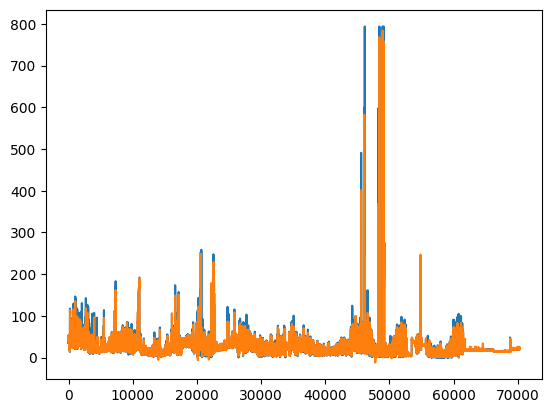

In [62]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [63]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.9229023065633334


In [64]:
import joblib
joblib.dump(model, 'Karnataka_PM2.5_µgm³.pkl')

['Karnataka_PM2.5_µgm³.pkl']

In [65]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
pred_check2 = model.predict(X)

In [67]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9113289674655881


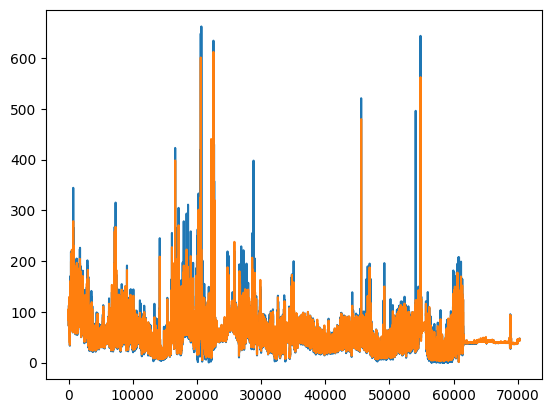

In [68]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [69]:
joblib.dump(model, 'Karnataka_PM10_µgm³.pkl')

['Karnataka_PM10_µgm³.pkl']